# Linear Regression


In [1]:
#We need to download a python file that contains the dataset for this lab

!wget -O data.py https://raw.githubusercontent.com/lionfish0/experimentation/refs/heads/master/data.py
import data
import numpy as np
import matplotlib.pyplot as plt

xdata,ydata,xtrue,ytrue = data.getdata()

--2024-11-13 21:29:37--  https://raw.githubusercontent.com/lionfish0/experimentation/refs/heads/master/data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15628 (15K) [text/plain]
Saving to: ‘data.py’

data.py             100%[===================>]  15.26K  --.-KB/s    in 0s      

2024-11-13 21:29:37 (57.8 MB/s) - ‘data.py’ saved [15628/15628]



# The Problem

Ecologists have monitored the population of Haggis on a particular mountain for five years. They have precise recordings (see `xtrue` and `ytrue`) and estimates from satellite remote sensing (`xdata` and `ydata`). They want to be able to *forecast* the *true population*, 12 months into the future, using the low-cost satellite remote sensing data.

This involves a different sort of split of data: The input data we need to use is lower quality, and the ground truth data (that we don't have access to when the model is deployed) is high quality. This sort of situation is quite common in real data problems (we might want to estimate how many of a competitor's products will be sold in the next month, using imprecise crowd surveys, for example).

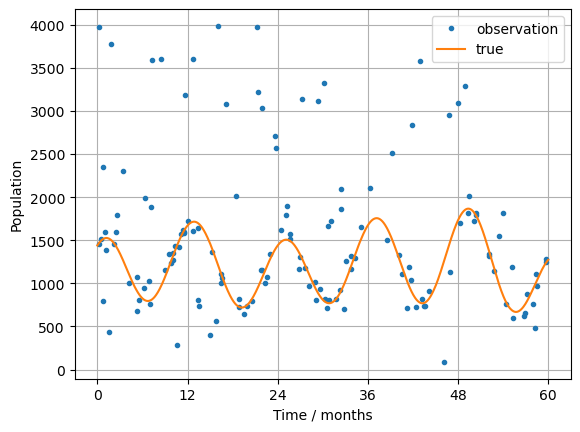

In [2]:
plt.plot(xdata,ydata,'.',label='observation')
plt.plot(xtrue,ytrue,'-',label='true')
plt.xticks(np.arange(0,61,12))
plt.xlabel('Time / months')
plt.ylabel('Population')
plt.legend()
plt.grid()

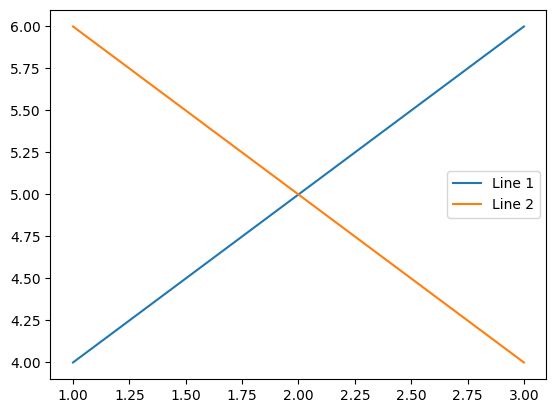

In [17]:
import matplotlib.pyplot as plt

# Plot data
plt.plot([1, 2, 3], [4, 5, 6], label='Line 1')
plt.plot([1, 2, 3], [6, 5, 4], label='Line 2')

# Example : Create a legend
plt.legend()

# Show the plot
plt.show()

### Question 1

When developing your model for this problem, how could you split your data into training, validation and testing? (and why?)

---

Answer here.

---

In [8]:
from sklearn.model_selection import train_test_split

# To split ? : Using command below
# X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

#Training Set: 70% of the data.
#Validation Set: 15% of the data.
#Test Set: 15% of the data.

# Why ?  We need to separate data to Train and test in order to validate accuracy of our model. How our model perform

# Polynomial Basis

We will start by using a polynomial basis to describe this data.

This method takes a series of $N$ values in $x$ (i.e. the time in months) and generates the appropriate design matrix, consisting of $N \times D$ values. I save this in $X$.

We will use this as the input to our model, we want to predict the population as a weighted sum of these basis functions,

In [4]:
# num basis = x^0,x^1,x^2,x^3
def polynomial(x, num_basis=4, data_limits=[-1., 1.]):
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i
    return Phi

`data_limits` will be useful later, if we use a different basis.

To help us understand this function, we will start with just three observation times (months 1-5), and a very small toy dataset, for illustration.

In [19]:
x = np.array([[1,2,3,4,5]]).T
y = np.array([[0,2.8,5.8,11.1,23]]).T

The resulting design matrix, in which additional features have been computed, is:

In [11]:
X = polynomial(x)
X #N x D matrix

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

The first column is $x^0$, the second is $x^1$, ...etc.

Recall from lectures that for ordinary least squares regression (with a linear model) there is a closed form solution to find the weights (parameters):

$\mathbf{w} = (X^\top X)^{-1} X^\top \mathbf{y}$

In [12]:
# M
# Matrix multiplication X.T @ X
w = np.linalg.inv(X.T @ X)@X.T@y
w

array([[-6.46      ],
       [ 9.23095238],
       [-3.33571429],
       [ 0.53333333]])

This shows the weights (or parameters) of our linear regression. They should be what we need to multiply each of the features by, before adding them up.

We can compute predictions as $X\mathbf{w}$ by first computing the features, the multiplying them with these weights (and summing):

[[-1.        ]
 [-0.91919192]
 [-0.83838384]
 [-0.75757576]
 [-0.67676768]
 [-0.5959596 ]
 [-0.51515152]
 [-0.43434343]
 [-0.35353535]
 [-0.27272727]
 [-0.19191919]
 [-0.11111111]
 [-0.03030303]
 [ 0.05050505]
 [ 0.13131313]
 [ 0.21212121]
 [ 0.29292929]
 [ 0.37373737]
 [ 0.45454545]
 [ 0.53535354]
 [ 0.61616162]
 [ 0.6969697 ]
 [ 0.77777778]
 [ 0.85858586]
 [ 0.93939394]
 [ 1.02020202]
 [ 1.1010101 ]
 [ 1.18181818]
 [ 1.26262626]
 [ 1.34343434]
 [ 1.42424242]
 [ 1.50505051]
 [ 1.58585859]
 [ 1.66666667]
 [ 1.74747475]
 [ 1.82828283]
 [ 1.90909091]
 [ 1.98989899]
 [ 2.07070707]
 [ 2.15151515]
 [ 2.23232323]
 [ 2.31313131]
 [ 2.39393939]
 [ 2.47474747]
 [ 2.55555556]
 [ 2.63636364]
 [ 2.71717172]
 [ 2.7979798 ]
 [ 2.87878788]
 [ 2.95959596]
 [ 3.04040404]
 [ 3.12121212]
 [ 3.2020202 ]
 [ 3.28282828]
 [ 3.36363636]
 [ 3.44444444]
 [ 3.52525253]
 [ 3.60606061]
 [ 3.68686869]
 [ 3.76767677]
 [ 3.84848485]
 [ 3.92929293]
 [ 4.01010101]
 [ 4.09090909]
 [ 4.17171717]
 [ 4.25252525]
 [ 4.33333

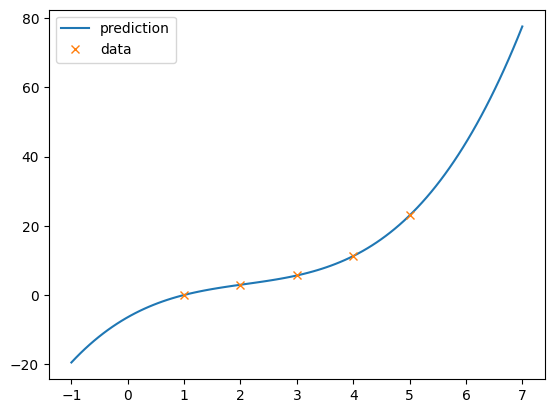

In [20]:
xtest = np.linspace(-1,7,100)[:,None]
print(xtest)
X = polynomial(xtest)
plt.plot(xtest,X@w,label='prediction')
plt.plot(x,y,'x',label='data')
plt.legend()

# Gaussian Basis

For the next question, we are going to write a new function that creates a **Gaussian basis**, instead of the polynomial basis. In the polynomial basis, each feature was of the form $x^i$, e.g. $x^3$. For a Gaussian basis, each basis function is of the form, $\exp[-\frac{(x-c_i)^2}{2w^2}]$. Where $c_i$ is the centre of each Gaussian basis, and $w$ is a constant (hyperparameter) that says how wide they are. You will want to space them uniformly across the domain specified by `data_limits`. So if `data_limits = [-2, 4]` and `num_basis = 4`. The centres will be at, -2 0 2 4.

Note: For now **we'll not have a constant term** (this will be ok if you standardise your data, as the mean will be zero).

### Question 2

Implement a function to compute the features of a Gaussian basis,

---

In [23]:
def gaussian(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis
    """
    #To do: Implement
    Phi = np.zeros((x.shape[0], num_basis))
    return Phi

---

Let's find the OLS solution using this basis.
First we compute the parameters from the training data

In [22]:
X = gaussian(x,4,[-1,7],2) #we spread out our four bases between -1 and 7, each has a 'bandwidth' of 2.
w = np.linalg.inv(X.T @ X)@X.T@y

LinAlgError: Singular matrix

then we compute some predictions along xtest vector,

In [ ]:
xtest = np.linspace(-1,7,100)[:,None]
X = gaussian(xtest,4,[-1,7],2)
plt.plot(xtest,X@w,'b--',label='prediction')

#This code plots the four bases that we are adding together.
#for i in range(len(w)):
#  plt.plot(xtest,X[:,i]*w[i],'b-',alpha=0.1)

plt.plot(x,y,'x',label='data')
plt.legend()

# Optimising using gradient

Rather than compute the closed form solution we will compute the gradient and use gradient descent **for ridge regression (L2 regularisation)**.


### Question 3:

Write a function to compute the gradient of the sum squared error wrt a parameter vector w. Given it has L2 regularisation (with regularisation parameter $\lambda$).

To get you started, here is the $L_2$ regularised cost function:

$$E = (y - \Phi w)^\top  (y - \Phi w) + \lambda w ^ \top w$$

Just a reminder, the first part of the equation is our normal sum-squared-error cost, but we are adding to it $\lambda w ^ \top w$; the sum square of our parameters -- this penalises larger parameters.

We need a function that returns the gradient of this cost function wrt $w$.

---

In [ ]:
def grad_ridge(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum squared error
    using the design matrix in Phi; under ridge regression with regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    return np.zeros_like(w) #To do: Implement


---

We also can write out the cost function, and use it to compute a numerical approximation to check our gradient function.

In [ ]:
def cost_fn(Phi,y,w,lam):
    err = Phi @ w - y
    return err.T @ err + lam * (w.T @ w)

def checkgrad(Phi,y,w,lam):
    grad = []
    for i in range(len(w)):
        new_w = w.copy()
        new_w[i]+=1e-6
        grad.append((cost_fn(Phi,y,new_w,lam)-cost_fn(Phi,y,w,lam))/1e-6)
    return np.array(grad)

# Gradient Descent

Here I've implmented a very simple `grad_descent` function that uses the gradient function you have written, to minimise the cost function (optimise using an appropriate learning rate).

In [ ]:
def grad_descent(grad_fn,Phi,y,lam):
    """
    Compute optimised w.
    Parameters:
       - grad, the gradient function
       - Phi, design matrix (shape N x D)
       - y, vector of observations (length N)
       - lam, regularisation parameter, lambda.
    Returns
       - w_optimsed, a vector (length D) that minimises the ridge regression cost function
    """
    w = np.zeros(Phi.shape[1])
    for it in range(10000):
        g = grad_fn(Phi,y,w,lam)
        w-=0.0001*g
    return w

# Back to the Haggis Example Dataset

In the code below, I standardise the training data labels, and use the methods you have written to make predictions for all the `true` data. Note that I'm holding out the last 12 months to see how the model looks for forecasting. I've also not used any validation, but instead have just used fixed value of the hyperparameters.

*Note: I've switched to using `Phi` to describe the design matrix instead of `X` for some reason.*

In [ ]:
#split our data. More challenging is that our training data is the low quality observations, while the ground truth is of higher quality.
#this is often the way in real data analysis: we might want to predict something using a cheaper/easier source of data.
xtrain = xdata[xdata[:,0]<48,:]
ytrain = ydata[xdata[:,0]<48]
xval = xtrue[xtrue[:,0]>=48,:]
yval = ytrue[xtrue[:,0]>=48]

#standardise
data_mean = np.mean(ytrain)
data_std = np.std(ytrain)
ytrain_standardised = (ytrain - data_mean)/data_std

#get the 120 gaussian bases
Phi = gaussian(xtrain,120,[0,60],3)

#perform gradience descent, using regularisation $\lambda = 0.01$.
w = grad_descent(grad_ridge,Phi,ytrain_standardised,0.01)
#compute the design matrix for all the true values (including the held out ones after 48 months).
#this is so we can make predictions at all these times.
truePhi = gaussian(xtrue,120,[0,60],3)

plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,'b--',label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')
plt.legend()

There are two more tasks to do:

1. Handle the outliers
2. Use a better basis

Consider first the outliers -- the data is very noisy, with some points appearing to lie near the true population, but many appearing to be irrelevant outliers.

Rather than use the sum-squared-error, which we saw assumes Gaussian distributed noise, we could use the sum-absolute-error, which assumes that there is exponentially distributed noise.

# Using the sum of absolute errors (instead of sum-squared-error)

### Question 4

Let's use the sum of absolute errors, rather than the sum squared error, as the cost function. We will also keep the L2 regulariser. So the cost function can be:

$$E = \sum_{i=1}^N{ \Big| [\Phi]_{i} w - y_i \Big|} + \lambda w^\top w$$

Write down a function that computes the gradient of this function wrt w.

Think really carefully about the effect of the 'absolute' operator $|\cdot|$, and how one differentiates through it. You might find `np.sign` useful.

---

In [ ]:
def grad_abs(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum absolute error
    using the design matrix in Phi; under L2 regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    return np.zeros_like(w) #To do: Implement

---

As before, we can write out the cost function, and use it to compute a numerical approximation,

In [ ]:
def cost_fn_abs(Phi,y,w,lam):
    return np.sum(np.abs(Phi @ w - y)) + lam * (w.T @ w)
    return err.T @ err

def checkgrad_abs(Phi,y,w,lam):
    grad = []
    for i in range(len(w)):
        new_w = w.copy()
        new_w[i]+=1e-6
        grad.append((cost_fn_abs(Phi,y,new_w,lam)-cost_fn_abs(Phi,y,w,lam))/1e-6)
    return np.array(grad)

Phi = gaussian(xtrain)
print("Numerical approximation to gradient:")
print(checkgrad_abs(Phi,ytrain,np.array([1.0,2,3,4]),0.1))
print("Analytically computed gradient:")
print(grad_abs(Phi,ytrain,np.array([1.0,2,3,4]),0.1))

Let's see what the result looks like, using the absolute error (instead of sum squared error):

In [ ]:
Phi = gaussian(xtrain[:,None],120,[0,60],3)
w = grad_descent(grad_abs,Phi,ytrain_standardised,0.01)
truePhi = gaussian(xtrue[:,None],120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,'--b',label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')
plt.legend()

### Question 5

Comment on this result in terms why this result appears better than the sum-squared cost function

---

Answer here

---

# Combining two bases (a Gaussian AND a sinusoidal one)

### Question 6

To improve its ability to forecast we observe that there seems to be an annual oscillation in the data. Can you create a basis that combines both Gaussian bases *AND* sinusoidal bases *of the appropriate wavelength*. Please use half of the `num_basis` for the Gaussian bases, and the other half for the sinusoidal ones. All the sinusoidal bases should have a 12 month period, but with a range of offsets (uniformly distributed between 0 and 6, but not including 6).

---

In [ ]:
def gaussian_and_sinusoidal(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis

    Half the bases are Gaussian, half are evenly spaced sines or cosines of 12 month period (offset by between 0 to 6 months)
    """
    # Answer here
    Phi = np.zeros((x.shape[0], num_basis))
    return Phi

---

It is instructive to look at what the design matrix looks like:

In [ ]:
plt.imshow(gaussian_and_sinusoidal(np.linspace(0,30,20)[:,None],20,data_limits=[0,30],width=10))

The left half consists of the Gaussian bases, the right the sinusoidal bases.

Let's see how this has affected the result:

In [ ]:
Phi = gaussian_and_sinusoidal(xtrain,120,[0,60],3)
w = grad_descent(grad_abs,Phi,ytrain_standardised,0.01)
truePhi = gaussian_and_sinusoidal(xtrue,120,[0,60],3)
plt.plot(xtrue,(truePhi @ w)*data_std+data_mean,'b--',label='Prediction')
plt.plot(xtrue,ytrue,'-r',label='True')
plt.plot(xtrain,ytrain,'.g',label='Training')

# Hyperparameter optimisation

We now need to select the hyperparameters (number of bases, Gaussian basis width, regularisation).

Write some code that:
- Selects good hyperparameters
- Draws a graph of the result

For this question you will need to:
- Decide on how you will select:
    - an appropriate number of bases
    - an appropriate Gaussian basis width
    - an appropriate regularisation term

We need to use a validation set to select these!

Remember: You are given the true underlying function, in `xtrue` and `ytrue`, so it is a comparison with that which matters. Remember also that you want to do well at **forecasting**!

You don't need to do cross-validation for this exercise, instead maybe use the first 36 months for training, the next 12 months for validation, and then retrain using the best hyperparameters on the first 48 months, and test on the last 12 months.

- Plot a graph showing (a) the training points used; (b) the true population (`truex`, `truey`); and (c) your predictions.

### Question 7

---

In [ ]:
#Answer here

#To start you off, my proposed split, but feel free to do something else...
xtrain = xdata[xdata[:,0]<36]
ytrain = ydata[xdata[:,0]<36]
xval = xtrue[(xtrue[:,0]>=36) & (xtrue[:,0]<48)]
yval = ytrue[(xtrue[:,0]>=36) & (xtrue[:,0]<48)]
xtest = xtrue[xtrue[:,0]>=48]
ytest = ytrue[xtrue[:,0]>=48]

---

In [ ]:
best_config

Finally, we plot the two sets of data (the low-quality remote sensing data, and the ground truth population data) and the predictions (using as training data the low-quality data from before 48 months, and predicting the last 12 months of the true (ground truth) data.

In [ ]:
truePhi = gaussian_and_sinusoidal(xtrue,Nbasis,[0,60],wid)
Phi = gaussian_and_sinusoidal(xdata,Nbasis,[0,60],wid)
plt.plot(xtrue,ytrue,'-r',label='True population')
plt.plot(xdata,Phi@w*data_std+data_mean,'--b',label='Predictions')
plt.plot(xfulltrain,yfulltrain,'x',label='Training data')
plt.legend()
plt.xlabel('Time / months')
plt.ylabel('Population');


# Conclusions

By using our knowledge of the structure of the data (the apparent sinusoidal pattern), selecting hyperparameters and using the absolute rather than squared error (to handle the outliers) our model appears to predict both the underlying true and future populations.

I need not say that obviously you won't need to be writing all these methods yourself when doing machine learning in the real world: libraries, such as sklearn, etc provide many of the methods you have written here. The purpose of the lab is for you to implement them yourself purely to learn about what is going on 'under the hood'. I'd recommend experimenting (try the polynomial basis with the haggis data, for example?) as you will develop further intuitions. In particular I think it is useful if the purpose of regularisation was clear (think about overfitting etc).

# Answers

### Question 1

> Need to forecast, so ensure that during validation and testing the training
data only preceeds the held out data. You could do x-validation, with progressively more training data being available.

### Question 2

```
def gaussian(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis
    """
    centres = np.linspace(data_limits[0],data_limits[1],num_basis)
    Phi = np.exp(-.5*((x-centres)**2/width**2))
    return Phi
```    
    
### Question 3

```
def grad_ridge(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum squared error
    using the design matrix in Phi; under ridge regression with regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    return - 2 * Phi.T @ y + 2 * Phi.T @ Phi @ w + 2 * lam * w
```

### Question 4

```
def grad_abs(Phi,y,w,lam):
    """
    Return an D dimensional vector of gradients of w, assuming we want to minimise the sum absolute error
    using the design matrix in Phi; under L2 regularisation parameter lambda.
    Arguments:
     - Phi, N x D design matrix
     - y, training outputs
     - w, parameters (we are finding the gradient at this value of w)
     - lam, the lambda regularisation parameter.
    """
    return np.sum(np.sign(Phi @ w - y)[:,None] * Phi,0) + 2 * lam * w
```

### Question 5

> The SSE error function penalises a large discrepancy more heavily, so the solution using SSE will end up with predictions more affected by the outliers than the Sum-Absolute-Error.

### Question 6

```
def gaussian_and_sinusoidal(x, num_basis=4, data_limits=[-1., 1.], width = 10):
    """
    Return an N x D design matrix.
    Arguments:
     - x, input values (N dimensional vector)
     - num_basis, number of basis functions (specifies D)
     - data_limits, a list of two numbers, specifying the minimum and maximum of the data input domain.
     - width, the 'spread' of the Gaussians in the basis

    Half the bases are Gaussian, half are evenly spaced cosines of 12 month period (offset by between 0 to 6 months)
    """
    centres = np.linspace(data_limits[0],data_limits[1],int(num_basis/2))
    PhiA = np.exp(-.5*((x-centres)**2/width**2))
    offsets = np.linspace(0,6,num_basis-int(num_basis/2),endpoint=False)
    PhiB = np.sin(np.pi*2*(x-offsets)/12)
    Phi = np.concatenate((PhiA,PhiB),axis=1)
    return Phi
```

### Question 7

```
#my proposed split, but feel free to do something else...
xtrain = xdata[xdata[:,0]<36]
ytrain = ydata[xdata[:,0]<36]
xval = xtrue[(xtrue[:,0]>=36) & (xtrue[:,0]<48)]
yval = ytrue[(xtrue[:,0]>=36) & (xtrue[:,0]<48)]
xtest = xtrue[xtrue[:,0]>=48]
ytest = ytrue[xtrue[:,0]>=48]

#standardise
data_mean = np.mean(ytrain)
data_std = np.std(ytrain)
ytrain_standardised = (ytrain - data_mean)/data_std

best_score = np.inf
best_config = None
best_w = None
for Nbasis in [20,40,80,160]:
    for lam in np.logspace(-2,1,4):
        for wid in np.logspace(0.2,1.5,5):
            Phi = gaussian_and_sinusoidal(xtrain,Nbasis,[0,60],wid)
            w = grad_descent(grad_abs,Phi,ytrain_standardised,lam)
            truevalPhi = gaussian_and_sinusoidal(xval,Nbasis,[0,60],wid)
            ypred = ((truevalPhi @ w)*data_std+data_mean)
            score = np.sum((yval-ypred)**2)
            if score < best_score:
                best_score = score
                best_config = [Nbasis,lam,wid]
                best_w = w

Nbasis, lam, wid = best_config

#we now combine the training and validation to see finally how it does...
xfulltrain = xdata[xdata[:,0]<48]
yfulltrain = ydata[xdata[:,0]<48]
data_mean = np.mean(yfulltrain)
data_std = np.std(yfulltrain)
yfulltrain_standardised = (yfulltrain - data_mean)/data_std

#using the best config retrain on the combined training and validation...
Phi = gaussian_and_sinusoidal(xfulltrain,Nbasis,[0,60],wid)
w = grad_descent(grad_abs,Phi,yfulltrain_standardised,lam)    
```